# Исследование надёжности заёмщиков - анализ банковских данных 💰

## Содержание
1) [Обзор данных](#anchor_1)  
2) [Предобработка данных](#anchor_2)  
3) [Лемматизация](#anchor_3)  
4) [Категоризация данных](#anchor_4)  
5) [Факторы, влияющие на возврат кредита в срок](#anchor_5)  
6) [Общий вывод](#anchor_6)

<a id='anchor_1'></a>
## Описание проекта

**Задача:**  
Изучить статистику о платёжеспособности клиентов и определить факторы, влияющие на факт погашения кредита в срок.

В рамках данного исследования изучим зависимость между наличием детей и возвратом кредита в срок. Постараемся определить, есть ли зависимость между семейным положением и возвратом кредита в срок. Изучим взаимосвязь между уровнем дохода и возвратом кредита в срок. Исследуем цели кредита и их влияние на возврат долга в срок.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования:**  
Предоставить кредитному отделу банка информацию о факторах, влияющих на возврат кредита в срок. Составить профиль благонадёжного клиента.

**Ход исследования:**  
Изучим данные о платёжеспосоности клиентов из файла, предоставленного банком. В силу того, что о качестве этих данных ничего не известно, сначала произведём обзор данных. Проверим данные на ошибки и оценим их влияние на исследование. Выполним предобработку данных.
Таким образом, исследование пройдёт в три этапа:
1. Обзор данных;
2. Предобработка данных;
3. Определение факторов, влияющих на возврат кредита.

## Обзор данных
Для начала произведём импорт всех необходимых нам библиотек:

In [1]:
# импорт библиотеки pandas
import pandas as pd

#импорт библиотеки numpy для операций с массивами
import numpy as np

# импорт библиотеки визуализации seaborn
import seaborn as sns

# импорт библиотеки matplotlib для продвинутой работы с графиками
import matplotlib.pyplot as plt

#вызовем библиотеку с функцией лемматизации
!pip install pymystem3
from pymystem3 import Mystem

# импорт библиотеки для игнорирования предупреждений
import warnings
warnings.filterwarnings("ignore")

Изучим общую информацию о данных.  Импортируем библиотеку **pandas**, прочитаем файл, сохраним его в переменной *df*. Выведем на экран первые 10 строк таблицы:

In [2]:
try:
    df = pd.read_csv('/datasets/data.csv')
except:
    df = pd.read_csv('data.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Воспользуемся методом *tail()*, чтобы вывести на экран последние 10 строк.

In [3]:
df.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


Одной командой получим общую информацию о таблице:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод** 

В каждой строке таблицы - данные о клиенте банка. Предварительно можно утверждать, что данных достаточно для проверки гипотез. Однако, в исходном массиве данных имеются пропуски и ошибки, которые могут исказить результаты исследования. Чтобы двигаться дальше, необходимо устранить проблемы в данных.

Итак, мы имеем дело с объемным массивом данных, в котором содержится более 21,5 тысяч строк. В таблице имеется 12 столбцов. Типы данных в столбцах - int, float и object.

Согласно документации к данным:
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

В названиях колонок нет нарушений стиля, их можно оставить без изменений. 
Количество значений в столбцах различается. Значит, в данных об общем трудовом стаже (days_employed) и ежемесячном доходе (total_income) есть пропущенные значения. Кроме того, беглый обзор первых и последних 10 строк таблицы позволяет заметить, что данные столбца days_employed некорректны. Большая их часть содержит отрицательное количество дней трудового стажа. Также имеются среди них нереально большие значения, говорящие о том, что люди работали более 1000 лет. Причина возникновения данных ошибок, вероятнее всего - некорректная выгрузка. Для их устранения стоило бы обратиться за повторной выгрузкой. Однако, данный показатель не имеет критически важного влияния на проверку наших гипотез, поэтому данный столбец можно исключить из исследуемого массива.

Пересохраним в переменной *df* таблицу без "поломанного" столбца. Вызовем метод *shape* (посчитаем количество граф), чтобы убедиться в произведенных изменениях.

In [5]:
# в списке перечислим только те столбцы, которые нам необходимы для исследования
df = df[['children', 'dob_years', 'education', 'education_id', 'family_status',
         'family_status_id', 'gender', 'income_type', 'debt', 'total_income', 'purpose']]
df.shape[1]

11

Таким образом, мы избавились от нежелательного столбца и можем продолжать исследование

<a id='anchor_2'></a>
## Предобработка данных

Исключим пропуски. Заменим тип данных на более удобный. Проверим данные на дубликаты. Проведём лемматизацию целей кредита. Разобъём данные на категории.

### Обработка пропусков

Сначала посчитаем, сколько в таблице пропущенных значений. Для этого достаточно двух методов Pandas:

In [6]:
df.isna().sum()

children               0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В столбце с данными о ежемесячном доходе имеются пробелы. Посчитаем, сколько процентов занимают пропуски в общем числе строк:

In [7]:
round(df['total_income'].isna().sum()/len(df)*100, 2)

10.1

**Вывод**

Отсутствие сведений может быть связано как с отсутствием дохода, так и с отсутствием предоставленной информации о нём. Доля пропущенных значений составляет более 10,1%, поэтому исключив эти сведения можно снизить качество проведенного исследования, и сответственно получить некорректные выводы.

Просмотрим первые 10 строк таблицы, в которых отсутствует информация о ежемесячном доходе.

In [8]:
df[df['total_income'].isna()].head(10)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Можно сделать вывод, что отсутствие информации о ежемесячном доходе не связано ни с одной характеристикой, приведенной в таблице. Сюда попадают клиенты разного пола и возраста, семейного положения, уровня образования и типа занятости. Они берут кредиты с разной целью. Таким образом, посчитаем эти пропуски случайными и заполним их.

Чтобы примерно оценить типичные значения ежемесячного дохода в данной выборке, найдем максимальное, минимальное значение, среднее арифметическое и медиану.

In [9]:
max_income = df['total_income'].max()
min_income = df['total_income'].min()
mean_income = df['total_income'].mean()
median_income = df['total_income'].median()
print(f'Максимальный ежемесячный доход в выборке - {max_income:.0f} рублей')
print(f'Минимальный ежемесячный доход в выборке - {min_income:.0f} рублей')
print(f'Средний ежемесячный доход в выборке {mean_income:.0f} рублей')
print(f'Медианный ежемесячный доход в выборке {median_income:.0f} рублей')

Максимальный ежемесячный доход в выборке - 2265604 рублей
Минимальный ежемесячный доход в выборке - 20667 рублей
Средний ежемесячный доход в выборке 167422 рублей
Медианный ежемесячный доход в выборке 145018 рублей


Из рассчитанных выше характеристик видно, что уровень дохода клиентов в представленной выборке очень разный. Максимальный доход превышает минимальный более, чем в 100 раз. На основании этого можно предположить, что в представленной совокупности данных могут присутствовать "выбросы" - нехарактерные для изучаемой выборки, слишком большие или слишком малые значения. В этом случае для характеристики центральной тенденции в выборке следует применять медиану. В то же время доход может сильно дифференцироваться в зависимости от типа занятости: доходы безработного или пенсионера будут сильно ниже, чем у предпринимателя, например. Таким образом, заполним пропущенные значения в данных о ежемесячном доходе рассчитанным отдельно для каждой группы по типу занятости медианным значением:

In [10]:
# пересохраним данные столбца 'total_income' с заполненными медианным значением пропусками
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median'))
df.isna().sum()


children            0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Вызвав методы *isna()* и *sum()* мы убедились в том, что все пропуски заполнены.

### Замена типа данных

Данные о ежемесячном доходе в таблице приведены в виде десятичных дробей с шестью знаками после запятой. Такой вид представления загромождает массив. Для более простого восприятия и большей наглядности заменим вещественный тип данных в этом столбце на целочисленный. При переводе значений в числа используют методы *to_numeric()* и *astype()*. Однако особенность метода *to_numeric()* в том, что при переводе все числа будут иметь тип *float*. В нужный тип значения переводят методом *astype()*. Выведем первые 5 строк таблицы на экран, чтобы убедиться.

In [11]:
df['total_income'] = df['total_income'].astype('int')
df.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


**Вывод**

Заменив данные столбца о ежемесячном доходе целочисленными значениями, мы упростили восприятие данного показателя. Кроме того, в таком виде сведения будет проще категоризовать в последующих шагах исследования.

### Обработка дубликатов и подозрительных значений

Посчитаем явные дубликаты в таблице одной командой:

In [12]:
df.duplicated().sum()

54

Причина появления явных дубликатов в данных чаще всего таится в некорректной выгрузке информации. Однако, это легко исправить. Вызовем специальный метод **pandas**, чтобы удалить явные дубликаты:

In [13]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)
# посмотрим размеры измененной таблицы
df.shape

(21471, 11)

Количество строк в таблице уменьшилось (в первоначальном варианте их было 21525). Однако, ещё раз посчитаем явные дубликаты в таблице - убедимся, что полностью от них избавились:

In [14]:
df.duplicated().sum()

0

Теперь избавимся от неявных дубликатов в таблице. Обратимся к столбцам, в которых содержатся числа. Выведем уникальные значения на экран, для удобства отсортируем их по возрастанию:

In [15]:
sorted(df['children'].unique())

[-1, 0, 1, 2, 3, 4, 5, 20]

Очевидно, отрицательное количество детей невозможно. Устраним ошибку ввода, заменив -1 на 1, и сразу проверим, как произвелась замена:

In [16]:
df['children'] = df['children'].replace(-1, 1)
sorted(df['children'].unique())

[0, 1, 2, 3, 4, 5, 20]

20 детей у одного человека выглядит подозрительно. Посмотрим на всю строку целиком, прибегнем к логической индексации:

In [17]:
df[df['children'] == 20]

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,21,среднее,1,женат / замужем,0,M,компаньон,0,145334,покупка жилья
720,20,44,среднее,1,женат / замужем,0,F,компаньон,0,112998,покупка недвижимости
1074,20,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518,получение образования
2510,20,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474,операции с коммерческой недвижимостью
2940,20,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739,на покупку автомобиля
...,...,...,...,...,...,...,...,...,...,...,...
20958,20,40,среднее,1,женат / замужем,0,F,сотрудник,1,133524,свой автомобиль
21272,20,37,среднее,1,женат / замужем,0,F,компаньон,0,102986,профильное образование
21337,20,53,среднее,1,женат / замужем,0,M,компаньон,0,172357,покупка жилой недвижимости
21351,20,52,среднее,1,женат / замужем,0,M,компаньон,0,156629,операции со своей недвижимостью


Неожиданный поворот событий: таких многодетных семей в исследуемом массиве оказалось аж 76. Однако, обзавестись двадцатью детьми, пусть даже приёмными, к 21 году нереально. Скорее всего в данном случае снова имеет место ошибка ввода. Выделим людей молодого возраста (скажем, до 40 лет) и заменим количество детей с 20 на 2, а затем посчитаем сколько супермногодетных клиентов в гендерном разрезе у нас останется:

In [18]:
df.loc[(df['children'] == 20) & (df['dob_years'] <= 40), 'children'] = 2
df[df['children'] == 20]['gender'].value_counts()

F    28
M    12
Name: gender, dtype: int64

В нашей выборке осталось 28 женщин и 12 мужчин старше 40 лет, имеющих 20 детей. Историческая справка: русский крестьянин Фёдор Васильев был женат дважды и имел 87 детей: 69 от первой жены и 18 от второй. Его первая жена является мировым рекордсменом по числу рождённых детей и входит в Книгу рекордов Гиннесса. Таким образом, посчитаем, что от подозрительных значений в графе *'children'*, мешающих нашему исследованию, мы избавились

Посмотрим, что хранит в себе столбец с возрастом:

In [19]:
print(sorted(df['dob_years'].unique()))

[0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


Возраст "0" похож на пропуск, заменим его на средний возраст клиентов, попавшив в выборку, приведём результат к целым числам:

In [20]:
df['dob_years'] = df['dob_years'].replace(0, df['dob_years'].mean())
df['dob_years'] = df['dob_years'].astype('int')
print(sorted(df['dob_years'].unique()))

[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


Проверим, какие данные хранятся в столбцах *'education_id'*, *'family_status_id'*, *'debt'* и *'gender'*:

In [21]:
sorted(df['education_id'].unique())

[0, 1, 2, 3, 4]

In [22]:
sorted(df['family_status_id'].unique())

[0, 1, 2, 3, 4]

In [23]:
sorted(df['debt'].unique())

[0, 1]

Данные в графах *'education_id'*, *'family_status_id'*, *'debt'* не имеют подозрительных значений и представлены в удобном для исследования виде. А вот столбец *'gender'* подготовил нам сюрприз:

In [24]:
sorted(df['gender'].unique())

['F', 'M', 'XNA']

В представленной совокупности нашёлся "неопознанный" пол. Выведем отдельно на экран строки с этим подозрительным значением, посмотрим, сколько их:

In [25]:
df[df['gender'] == 'XNA']

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10690,0,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости


"Поломанных" строк оказалось совсем немного. Заменим "неопознанный" пол на любой из известных (например, 'M'):

In [26]:
df['gender'] = df['gender'].replace('XNA', 'M')
sorted(df['gender'].unique())

['F', 'M']

Во время обзора первых и последних 10 строк таблицы мы заметили, что в графе 'education' дубликаты скрыты за буквами разных регистров. Убедимся в этом, вызвав метод value_counts(0):

In [27]:
df['education'].value_counts()

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

Таким образом, мы выяснили,что образование в исследуемой совокупности представлено пятью категориями, но распознается большее количество групп из-за различного способа написания одного и того же слова (человеческий фактор, отсутствие единого шаблона заполнения анкеты). Исправим это, приведя все буквы в данном столбце к нижнему регистру:

In [28]:
df['education'] = df['education'].str.lower()
df['education'].value_counts()

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Ещё раз поищем явные дубликаты. Они могли появиться в результате наших действий.

In [29]:
df.duplicated().sum()

17

In [30]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)
# посмотрим размеры измененной таблицы
print(df.shape)
# посчитаем количество явных дубликатов
df.duplicated().sum()

(21454, 11)


0

Проверим, есть ли похожие проблемы в других столбцах со строковыми данными. Выведем уникальные значения и количество их упоминаний:

In [31]:
df['family_status'].value_counts()

женат / замужем          12339
гражданский брак          4151
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

В графе с семейным положением нет скрытых дубликатов. Однако, категория "Не женат / не замужем" единственная из всех содержит сочетание букв верхнего и нижнего регистра, поэтому приведем её к аналогичному другим категориям виду:

In [32]:
df['family_status'] = df['family_status'].str.lower()
df['family_status'].value_counts()

женат / замужем          12339
гражданский брак          4151
не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

Аналогичным образом поступим с графой *'income_type'*:

In [33]:
df['income_type'].value_counts()

сотрудник          11084
компаньон           5078
пенсионер           3829
госслужащий         1457
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Графа с типом занятости представлена в  удобном для исследования виде.

Проверим, какие уникальные значения содержит в себе столбец с целью получения кредита:

In [34]:
df['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Так много разных целей. Но таких ли разных? И много ли? Разберемся с этим на следующих шагах предобработки данных.

**Вывод**

На этапе обработки дубликатов и подозрительных значений мы сначала выявили при помощи двух методов (*duplicated()* и *sum()*), а затем устранили явные дубликаты (полный повтор строки) методом *drop_duplicates()*. Далее мы проверили каждый из столбцов на предмет наличия в них скрытых дубликатов и также их устранили (для граф с количественными данными в основном использовали метод *unique()*, а для категориальных - *value_counts()*). В процессе нами были обнаружены подозрительные/нелогичные значения, от которых мы также избавились.

<a id='anchor_3'></a>
## Лемматизация

Графа целей получения кредита содержит в себе много вариантов этих целей. Однако, многие из них идентичны или схожи по смыслу. Необходимо привести данные этого столбца к унифицированному виду - выделить несколько основных целей получения кредита и перезаполнить графу. Для выполнения этой задачи прибегнем к **лемматизации** - приведению слова к его словарной форме (лемме). Одна из библиотек с функцией лемматизации на русском языке - *pymystem3*.

Сузим наш список целей получения кредита к следующим основным категориям:
* свадьба,
* жильё/недвижимость,
* получение образования,
* покупка автомобиля,
* другое.

Для этого напишем функцию, которую потом через *apply()* применим к столбцу, чтобы она сразу сделала категоризацию, перезапишем рассматриваемый столбец:

In [35]:
m = Mystem()
#напишем функцию для категоризации целей получения кредита
def purpose_category(row):
    lemma = m.lemmatize(row['purpose'])
    if 'свадьба' in lemma:
        return 'свадьба'
    if ('жилье' in lemma) or ('недвижимость' in lemma):
        return 'жильё/недвижимость'
    if 'образование' in lemma:
        return 'получение образования'
    if 'автомобиль' in lemma:
        return 'покупка автомобиля'
    return 'другое'

df['purpose'] = df.apply(purpose_category, axis=1)
df.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,жильё/недвижимость
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,покупка автомобиля
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,жильё/недвижимость
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,получение образования
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба


Посмотрим, как распределились клиенты банка на новые категории по целям получения кредита:

In [36]:
df['purpose'].value_counts()

жильё/недвижимость       10811
покупка автомобиля        4306
получение образования     4013
свадьба                   2324
Name: purpose, dtype: int64

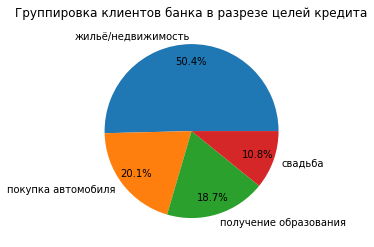

In [37]:
plot_df = df[['purpose', 'total_income']].groupby(
    by = 'purpose', as_index=False).agg({'total_income':'count'})
plt.pie(plot_df['total_income'], labels = plot_df['purpose'], autopct='%.01f%%', pctdistance=0.8, )
plt.title('Группировка клиентов банка в разрезе целей кредита')
plt.Figure(figsize=[12,6])
plt.show()

**Вывод**

Таким образом, мы благополучно разбили совокупность на 4 главные группы по целям получения кредита. Применив лемматизацию, мы объединили синонимичные категории первоначальной группировки по целям получения кредита. Теперь наша таблица получила вид, удобный для расчета характеристик и установления взаимосвязей, которые смогут помочь нам определить факторы, которые влияют на возврат кредита.

<a id='anchor_4'></a>
## Категоризация данных

Для того, чтобы выявить факторы, которые сильнее других влияют на возврат кредита в срок, целесообразно разбить совокупность наблюдений на группы по определенным критериям. Мы уже так поступили с целями получения кредита. Аналогичным образом выделим в совокупности категории по наличию детей, семейному положению или уровню дохода.

Итак, по наличию детей разобъём наши данные на 3 группы:
* бездетная семья (0 детей),
* малодетная семья (1-2 ребёнка),
* многодетная семья (3 и более детей)

Запишем правила классификации клиентов как функцию, на вход которой будет попадать количество детей в семье, а возвращать она будет категорию клиента по наличию детей:

In [38]:
def family_type(children):
    """
    Возвращает тип семьи по значению childfen, используя правила:
    - 'бездетная семья', если childfen == 0;
    - 'малодетная семья', если childfen от 1 до 2;
    - 'многодетная семья', childfen >= 3.
    """
    if children == 0:
        return 'бездетная семья'
    if children >= 3:
        return 'многодетная семья '
    return 'малодетная семья'
df['family_type'] = df['children'].apply(family_type)
df.sample(5)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,family_type
8769,0,52,среднее,1,женат / замужем,0,F,компаньон,0,115298,жильё/недвижимость,бездетная семья
19956,1,41,среднее,1,женат / замужем,0,F,компаньон,0,152469,жильё/недвижимость,малодетная семья
4365,0,58,высшее,0,женат / замужем,0,F,пенсионер,0,133626,получение образования,бездетная семья
6195,0,47,среднее,1,женат / замужем,0,F,госслужащий,0,141908,покупка автомобиля,бездетная семья
916,1,39,начальное,3,женат / замужем,0,M,сотрудник,0,165491,получение образования,малодетная семья


Проверим наполненность полученных групп, посчитав количество значений по каждой категории:

In [39]:
df['family_type'].value_counts()

бездетная семья       14091
малодетная семья       6943
многодетная семья       420
Name: family_type, dtype: int64

Таким образом, каждая из трёх групп оказалась наполнена в достаточной мере для того, чтобы рассчитывать статистические показатели, сравнивать их между собой и делать выводы.

По семейному положению категории нам подскажут сами значения в столбце *'family_status'*. Разделим клиентов на две группы, принимая во внимание количество человек, на которых ложится кредитное бремя:
* в браке - женат / замужем или гражданский брак,
* одинок(а) - не женат / не замужем, в разводе или вдовец / вдова.

Запишем правила классификации клиентов как функцию, на вход которой будет попадать  семейное положение, а возвращать она будет категорию клиента по семейному статусу:

In [40]:
def married_single(family_status):
    """
    Возвращает категорию семейного положения по значению family_status, используя правила:
    - 'в браке', если family_status == 'женат / замужем' или 'гражданский брак';
    - 'одинок(а)', в остальных случаях.
    """
    if (family_status == 'женат / замужем') or (family_status == 'гражданский брак'):
        return 'в браке'
    return 'одинок(а)'
    
df['family_category'] = df['family_status'].apply(married_single)
df.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,family_type,family_category
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,жильё/недвижимость,малодетная семья,в браке
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,покупка автомобиля,малодетная семья,в браке
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,жильё/недвижимость,бездетная семья,в браке
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,получение образования,многодетная семья,в браке
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,бездетная семья,в браке


Проверим наполненность полученных групп, посчитав количество значений по каждой из двух категорий:

In [41]:
df['family_category'].value_counts()

в браке      16490
одинок(а)     4964
Name: family_category, dtype: int64

Таким образом, каждая из групп оказалась наполнена в достаточной мере для того, чтобы рассчитывать статистические показатели, сравнивать их между собой и делать выводы.

По уровню ежемесячного дохода выделим следующие группы:
* очень низкий доход (до 50000 рублей включительно),
* низкий доход (от 50000 до 100000 рублей включительно),
* средний доход (от 100000 до 200000 рублей включительно),
* высокий доход (200000 до 450000 рублей включительно),
* очень высокий доход (от 450000 рублей и выше)

Запишем правила классификации клиентов как функцию, на вход которой будет попадать уровень ежемесячного дохода, а возвращать она будет категорию клиента по уровню дохода:

In [42]:
def income_category(income):
    """
    Возвращает группу по доходам по значению income, используя правила:
    - 'очень низкий доход', если income <= 50000;
    - 'низкий доход', если income от 50000 до 100000;
    - 'средний доход', если income от 100000 до 200000;
    - 'высокий доход', если income от 200000 до 450000;
    - 'очень высокий доход', income >= 450000.
    """
    if income <= 50000:
        return 'очень низкий доход'
    if (income > 50000) & (income <= 100000):
        return 'низкий доход'
    if (income > 100000) & (income <= 200000):
        return 'средний доход'
    if (income > 200000) & (income <= 450000):
        return 'высокий доход'
    return 'очень высокий доход'
df['income_category'] = df['total_income'].apply(income_category)
df.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,family_type,family_category,income_category
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,жильё/недвижимость,малодетная семья,в браке,высокий доход
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,покупка автомобиля,малодетная семья,в браке,средний доход
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,жильё/недвижимость,бездетная семья,в браке,средний доход
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,получение образования,многодетная семья,в браке,высокий доход
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,бездетная семья,в браке,средний доход


Проверим наполненность полученных групп, посчитав количество значений по каждой категории:

In [43]:
df['income_category'].value_counts()

средний доход          11924
высокий доход           4734
низкий доход            4091
очень низкий доход       372
очень высокий доход      333
Name: income_category, dtype: int64

Таким образом, каждая из пяти групп оказалась наполнена в достаточной мере для того, чтобы рассчитывать статистические показатели, сравнивать их между собой и делать выводы.

**Вывод**

Мы имеем дело с большим массивом данных. Мы прибегли к категозиции и разбили совокупность на общие группы, приняв в качестве параметров исследуемые характеристики. Теперь мы можем пытаться устанавливать зависимости между показателями, рассчитывая показатели описательной статистики по каждой группе отдельно и сравнивая их между собой.

<a id='anchor_5'></a>
## Факторы, влияющие на возврат кредита в срок

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Выдвенем гипотезу о том, что наличие трёх и более детей у клиента увеличивает риск банка вернуть себе кредитные средства в срок, т.к. с ростом количества детей у клиента растёт уровень необходимых ежемесячных затрат на содержание семьи.

Построим сводную таблицу, где установим, каким образом распределятся инидикаторы наличия задолженности по кредитам (графа исходного датафрейма *'debt'*) внутри каждой категории количества детей и рассчитаем долю неблагонадёжных клиентов от общего числа клиентов по каждой категории:

In [44]:
pivot_children = df.pivot_table(
    index='family_type',
    columns = 'debt',
    values = 'children',
    aggfunc = 'count'
)
pivot_children['debt_percent'] = 100*pivot_children[1]/(pivot_children[0]+pivot_children[1])
#отсортируем результаты по возрастанию доли
pivot_children = pivot_children.sort_values(by='debt_percent', ascending=True)
pivot_children.style.format({'debt_percent':'{:.2f}%'})

debt,0,1,debt_percent
family_type,,,
бездетная семья,13028,1063,7.54%
многодетная семья,385,35,8.33%
малодетная семья,6300,643,9.26%


**Вывод**

Таким образом, наша гипотеза подтвердилась частично. Наибольший процент потенциальных неблагонадёжных клиентов выявился в категории малодетных семей (то есть среди клиентов с 1 или 2 детьми). Однако, стоит отметить, что минимальная доля неблагонадёжных клиентов от общего числа клиентов по категории наблюдается именно в бездетных семьях. Отсюда вывод: зависимость между наличием детей и возвратом кредита в срок есть. Клиент без детей вернёт кредит в срок с большей вероятностью, чем клиент, имеющий детей. 

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Выдвинем гипотезу о том, что семейные люди благонадёжнее одиноких, так как они могут "подстраховывать" друг друга в вопросе выплаты кредита.

Построим сводную таблицу, где установим, каким образом распределятся инидикаторы наличия задолженности по кредитам (графа исходного датафрейма 'debt') внутри каждой из двух категорий и рассчитаем долю неблагонадёжных клиентов от общего числа клиентов по каждой категории:

In [45]:
pivot_family_category = df.pivot_table(
    index='family_category',
    columns = 'debt',
    values = 'family_status',
    aggfunc = 'count'
)
pivot_family_category['debt_percent'] = 100*pivot_family_category[
        1]/(pivot_family_category[0]+pivot_family_category[1])
pivot_family_category.style.format({'debt_percent':'{:.2f}%'})

debt,0,1,debt_percent
family_category,,,
в браке,15171,1319,8.00%
одинок(а),4542,422,8.50%


На первый взгляд, наша гипотеза подтвердилась. Процент группы риска среди одиноких выше, чем среди семейных. Однако, разрыв всего лишь пол процента. Добавим в сводную таблицу все категории семейного положения, которых изначально было пять, и посмотрим, как неблагонадёжные клиенты распределятся в этих группах:

In [46]:
pivot_family_category = df.pivot_table(
    index=['family_category', 'family_status'],
    columns = 'debt',
    values = 'family_type',
    aggfunc = 'count'
)
pivot_family_category['debt_percent'] = 100*pivot_family_category[
        1]/(pivot_family_category[0]+pivot_family_category[1])
pivot_family_category.style.format({'debt_percent':'{:.2f}%'})

Получили интересную картину: наибольший процент неблагонадёжных клиентов наблюдается в группах 'гражданский брак' и 'не женат / не замужем', а процент в группах 'женат / замужем' и 'в разводе' практически одинаковый.

**Вывод**

Зависимость между семейным положением и возвратом кредита в срок не очевидна. Самыми надёжными оказались овдовевшие клиенты, в то время как люди, состоящие в гражданском браке, попали в группу риска. Таким образом одинокие и семейные люди практически с одинаковой вероятностью могут не вернуть кредит в срок.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Выдвинем гипотезу о том, что люди с большим уровнем дохода с большей вероятностью возвращают кредит в срок.

Построим сводную таблицу, где установим, каким образом распределятся инидикаторы наличия задолженности по кредитам (графа исходного датафрейма 'debt') внутри каждой категории по ежемесячному доходу и рассчитаем долю неблагонадёжных клиентов от общего числа клиентов по каждой группе:

In [47]:
pivot_income = df.pivot_table(
    index='income_category',
    columns = 'debt',
    values = 'total_income',
    aggfunc = 'count'
)
pivot_income['debt_percent'] = 100*pivot_income[1]/(pivot_income[0]+pivot_income[1])
#отсортируем результаты по возрастанию доли
pivot_income = pivot_income.sort_values(by='debt_percent', ascending=True)
pivot_income.style.format({'debt_percent':'{:.2f}%'})

debt,0,1,debt_percent
income_category,,,
очень высокий доход,315,18,5.41%
очень низкий доход,349,23,6.18%
высокий доход,4394,340,7.18%
низкий доход,3760,331,8.09%
средний доход,10895,1029,8.63%


Наша гипотеза подтвердилась частично, самой благонадёжной группой оказались клиенты с очень высоким доходом, а в группу риска попали клиенты со средним уровнем дохода. Часто случается, что уровень образования связан с размерами доходов. Проверим, влияет ли этот фактор на исследуемый нами вопрос благонадёжности клиентов, добавим ещё один столбец в сводную таблицу:

In [48]:
pivot_income = df.pivot_table(
    index=['income_category', 'education'],
    columns = 'debt',
    values = 'total_income',
    aggfunc = 'count'
)
pivot_income['debt_percent'] = 100*pivot_income[1]/(pivot_income[0]+pivot_income[1])
pivot_income.style.format({'debt_percent':'{:.2f}%'})

Среди клиентов, имеющих учёную степень не нашлось таких, которые бы имели непогашенные задолженности по кредиту, а неоконченное высшее образование в совокупности с очень высоким доходом составили серьёзную группу риска. По категории начального образования процент неблагонадёжных клиентов тоже достаточно высок.

**Вывод**

Зависимость между уровнем ежемесячного дохода и вероятностью возврата кредита в срок есть. Чаще других допускают задолженность клиенты со средним уровем дохода, а с высокими доходами - реже. При удовлетворении заявок на кредит следует обращать внимание также и на уровень образования клиентов. Неоконченное высшее и начальное образование - группа риска.

- Как разные цели кредита влияют на его возврат в срок?

Выдвинем гипотезу о том, что краткосрочные кредиты (на свадьбу, получение образования или покупку автомобиля) с большей вероятностью не гасятся в срок, чем долгосрочные (на приобретение жилья или недвижимости. Связано это с большими сроками гашения и частым залогом собственности в последнем случае.

Построим сводную таблицу, где установим, каким образом распределятся инидикаторы наличия задолженности по кредитам (графа исходного датафрейма 'debt') внутри каждой категории по целям получения кредита и рассчитаем долю неблагонадёжных клиентов от общего числа клиентов по каждой группе:

In [49]:
pivot_purpose = df.pivot_table(
    index='purpose',
    columns = 'debt',
    values = 'total_income',
    aggfunc = 'count')
pivot_purpose['debt_percent'] = 100*pivot_purpose[1]/(pivot_purpose[0]+pivot_purpose[1])
#отсортируем результаты по возрастанию доли
pivot_purpose = pivot_purpose.sort_values(by='debt_percent', ascending=True)
pivot_purpose.style.format({'debt_percent':'{:.2f}%'})

debt,0,1,debt_percent
purpose,,,
жильё/недвижимость,10029,782,7.23%
свадьба,2138,186,8.00%
получение образования,3643,370,9.22%
покупка автомобиля,3903,403,9.36%


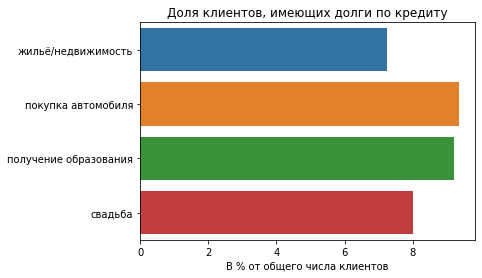

In [50]:
sns.barplot(x=100*df.groupby('purpose')['debt'].sum()/df.groupby('purpose')['debt'].count(),
            y=df['purpose'].unique())
plt.title('Доля клиентов, имеющих долги по кредиту')
plt.xlabel('В % от общего числа клиентов');

**Вывод**

Наша гипотеза подтвердилась: люди, получающие кредит с целью приобретения жилья или недвижимости реже других нарушаю сроки гашения кредита. "Рискованными" целями оказалось получение образования и покупка автомобиля.

<a id='anchor_6'></a>
## Общий вывод

По заявке заказчика, кредитного отдела банка, перед нами стояла задача проверить влияние некоторых факторов на факт гашения кредита в срок. Данные о платёжеспосоности клиентов мы получили из файла, предоставленного банком. О качестве этих данных ничего не было известно.

На этапе обзора данных мы выяснили, что данных достаточно для проверки гипотез. Однако, в исходном массиве имелись пропуски и ошибки, которые могли бы исказить результаты исследования. Мы исключим пропуски. Заменили данные столбца о ежемесячном доходе целочисленными значениями, упростив тем самым восприятие данного показателя. Кроме того, в таком виде сведения проще категоризовать.

На этапе обработки дубликатов и подозрительных значений мы сначала выявили, а затем устранили явные дубликаты (полный повтор строки). Далее мы проверили каждый из столбцов на предмет наличия в них скрытых дубликатов и также их устранили. В процессе нами были обнаружены подозрительные/нелогичные значения, от которых мы также избавились.

Применив лемматизацию, мы объединили синонимичные категории первоначальной группировки по целям получения кредита. Так как мы имели дело с большим массивом данных, для поиска ответов на поставленные вопросы мы прибегли к категозиции и разбили совокупность на общие группы, приняв в качестве параметров исследуемые характеристики. Далее мы установили зависимости между показателями, рассчитывая показатели описательной статистики по каждой группе отдельно и сравнивая их между собой, нашли ответы на поставленные перед нами вопросы:
1. Есть ли зависимость между наличием детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

Гипотеза о прямой зависимости возврата кредита в срок от наличия детей подтвердилась частично. Наибольший процент потенциальных неблагонадёжных клиентов выявился в категории малодетных семей (то есть среди клиентов с 1 или 2 детьми). Однако, стоит отметить, что минимальная доля неблагонадёжных клиентов от общего числа клиентов по категории наблюдается именно в бездетных семьях. Отсюда вывод: зависимость между наличием детей и возвратом кредита в срок есть. Клиент без детей вернёт кредит в срок с большей вероятностью, чем клиент, имеющий детей.

Зависимость между семейным положением и возвратом кредита в срок оказалась не очевидной. Самыми надёжными были установлены овдовевшие клиенты, в то время как люди, состоящие в гражданском браке, попали в группу риска. Таким образом одинокие и семейные люди практически с одинаковой вероятностью могут не вернуть кредит в срок.

Зависимость между уровнем ежемесячного дохода и вероятностью возврата кредита в срок есть. Чаще других допускают задолженность клиенты со средним уровем дохода, а с высокими доходами - реже. При удовлетворении заявок на кредит следует обращать внимание также и на уровень образования клиентов. Неоконченное высшее и начальное образование - группа риска.

Наша гипотеза о том, что люди, получающие кредит с целью приобретения жилья или недвижимости реже других нарушают сроки гашения кредита. "Рискованными" целями оказалось получение образования и покупка автомобиля.

При построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку первостепенно следует учитывать следующие факторы: цель получения кредита и уровень дохода. Принять во внимание также можно наличие у клиента детей и уровень образования.